In [19]:
df

,Date,macro_positioning_data_AdjClose,macro_positioning_data_Close,macro_positioning_data_High,macro_positioning_data_Low,macro_positioning_data_Open,macro_positioning_data_Volume,macro_positioning_data_CPI,macro_positioning_data_CorePCE,macro_positioning_data_Payrolls,...,spy_fx_flows_volume,spy_fx_flows_flow_vol_z20,spy_fx_flows_flow_money_proxy5,spy_fx_flows_uso_ret5,spy_fx_flows_gld_ret5,spy_fx_flows_eurusd_ret5,spy_fx_flows_usdjpy_ret5,spy_fx_flows_usd_strength,spy_fx_flows_breadth_proxy,SPY_NextDay_Return
0,2014-12-31,171.185318,205.539993,208.190002,205.389999,207.990005,130333800.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000341
1,2015-01-02,171.093689,205.429993,206.880005,204.179993,206.380005,121465900.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.017865
2,2015-01-05,168.003815,201.720001,204.369995,201.350006,204.169998,169632600.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009615
3,2015-01-06,166.421371,199.820007,202.720001,198.860001,202.089996,209151400.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012461
4,2015-01-07,168.495163,202.309998,202.720001,200.880005,201.419998,125346700.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2614,2025-05-23,575.806641,579.109985,581.809998,575.599976,575.979980,76029000.0,320.58,125.79,159452.0,...,65181084.0,0.691541,0.031887,-0.001615,0.052712,0.014619,-0.020202,-0.017410,-0.006051,0.020791
2615,2025-05-27,587.778015,591.150024,591.309998,578.429993,586.070007,72588500.0,320.58,125.79,159452.0,...,67535398.0,0.781817,0.109146,-0.017954,0.021709,0.012413,-0.009395,-0.010904,-0.007060,-0.005785
2616,2025-05-28,584.377502,587.729980,592.770020,586.989990,591.559998,68445500.0,320.58,125.79,159452.0,...,59185032.0,0.086945,0.091252,-0.011215,0.000758,-0.005173,0.009697,0.007435,-0.010472,0.003947
2617,2025-05-29,586.684265,590.049988,593.200012,586.070007,593.059998,69973300.0,320.58,125.79,159452.0,...,62256919.0,0.397780,-0.269299,-0.005918,-0.000687,0.003945,0.000407,-0.001769,-0.007153,-0.001119


In [33]:
sp500 = yf.download(
    "^GSPC",
    start=start_date,
    end=end_date
)

# -----------------------------------------------------
# FORCE FLATTEN MULTIINDEX (works for ALL yfinance versions)
# -----------------------------------------------------
if isinstance(sp500.columns, pd.MultiIndex):
    # join column levels with "_"
    sp500.columns = ['_'.join([str(c) for c in col if c != '']) for col in sp500.columns]
else:
    sp500.columns = sp500.columns.astype(str)

# -----------------------------------------------------
# FIND THE COLUMN THAT CONTAINS "Close"
# (Handles: "Close", "^GSPC_Close", "GSPC_Close", "Adj Close", etc.)
# -----------------------------------------------------
close_col = [c for c in sp500.columns if "Close" in c][0]

sp500 = sp500.reset_index()[["Date", close_col]]
sp500 = sp500.rename(columns={close_col: "Close"})

sp500

/var/folders/7v/53v6_s_j22jgxn1yq73tgjyc0000gn/T/ipykernel_49647/389644291.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download(
[*********************100%***********************]  1 of 1 completed


,Date,SP500
0,2014-12-31,2058.899902
1,2015-01-02,2058.199951
2,2015-01-05,2020.579956
3,2015-01-06,2002.609985
4,2015-01-07,2025.900024
...,...,...
2613,2025-05-22,5842.009766
2614,2025-05-23,5802.819824
2615,2025-05-27,5921.540039
2616,2025-05-28,5888.549805


In [29]:
sp500 = yf.download("^GSPC", start=start_date, end=end_date)

# --- FIX MULTIINDEX ---
if isinstance(sp500.columns, pd.MultiIndex):
    sp500.columns = sp500.columns.map(lambda x: x[-1])  # take last level (e.g. "Close")

/var/folders/7v/53v6_s_j22jgxn1yq73tgjyc0000gn/T/ipykernel_49647/3576271761.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download("^GSPC", start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


In [38]:
data['Close']

0       2058.899902
1       2058.199951
2       2020.579956
3       2002.609985
4       2025.900024
           ...     
2613    5842.009766
2614    5802.819824
2615    5921.540039
2616    5888.549805
2617    5912.169922
Name: Close, Length: 2618, dtype: float64

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesRegressor

# ----------------------------------------------------------
# 1. LOAD YOUR DATA
# ----------------------------------------------------------
df = pd.read_csv("/Users/seungwoo/PycharmProjects/FITE3010-Group-Porject/Brian/Code/master_spy_clean_final.csv")  # replace with your filename
df["Date"] = pd.to_datetime(df["Date"])

start_date = df["Date"].min()
end_date = df["Date"].max()

print(f"Fetching S&P 500 (^GSPC) data from {start_date} to {end_date}")

# ----------------------------------------------------------
# 2. DOWNLOAD S&P 500 DATA FROM YAHOO FINANCE
# ----------------------------------------------------------)
sp500 = yf.download(
    "^GSPC",
    start=start_date,
    end=end_date
)

# -----------------------------------------------------
# FORCE FLATTEN MULTIINDEX (works for ALL yfinance versions)
# -----------------------------------------------------
if isinstance(sp500.columns, pd.MultiIndex):
    # join column levels with "_"
    sp500.columns = ['_'.join([str(c) for c in col if c != '']) for col in sp500.columns]
else:
    sp500.columns = sp500.columns.astype(str)

# -----------------------------------------------------
# FIND THE COLUMN THAT CONTAINS "Close"
# (Handles: "Close", "^GSPC_Close", "GSPC_Close", "Adj Close", etc.)
# -----------------------------------------------------
close_col = [c for c in sp500.columns if "Close" in c][0]

sp500 = sp500.reset_index()[["Date", close_col]]
sp500 = sp500.rename(columns={close_col: "SP500"})

# ----------------------------------------------------------
# 3. MERGE YOUR DATA WITH S&P 500
# ----------------------------------------------------------
# data = df.merge(sp500, on="Date", how="inner")

data = pd.merge(df, sp500, on="Date", how="inner")

print("Merged data shape:", data.shape)

# ----------------------------------------------------------
# 4. DATA CLEANING CHECKS
# ----------------------------------------------------------
print("\n--- Missing Values ---")
print(data.isnull().sum())

print("\n--- Duplicate Rows ---")
print(data.duplicated().sum())

print("\n--- Data Types ---")
print(data.dtypes)

# Basic cleaning
data = data.drop_duplicates()
data = data.fillna(method="ffill").fillna(method="bfill")

/var/folders/7v/53v6_s_j22jgxn1yq73tgjyc0000gn/T/ipykernel_49647/829630426.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download(
[*********************100%***********************]  1 of 1 completed

Fetching S&P 500 (^GSPC) data from 2014-12-31 00:00:00 to 2025-05-30 00:00:00
Merged data shape: (2618, 252)

--- Missing Values ---
Date                                0
macro_positioning_data_AdjClose     0
macro_positioning_data_Close        0
macro_positioning_data_High         0
macro_positioning_data_Low          0
                                   ..
spy_fx_flows_usdjpy_ret5           19
spy_fx_flows_usd_strength          19
spy_fx_flows_breadth_proxy         19
SPY_NextDay_Return                  0
SP500                               0
Length: 252, dtype: int64

--- Duplicate Rows ---
0

--- Data Types ---
Date                               datetime64[ns]
macro_positioning_data_AdjClose           float64
macro_positioning_data_Close              float64
macro_positioning_data_High               float64
macro_positioning_data_Low                float64
                                        ...      
spy_fx_flows_usdjpy_ret5                  float64
spy_fx_flows_usd_strength  


/var/folders/7v/53v6_s_j22jgxn1yq73tgjyc0000gn/T/ipykernel_49647/829630426.py:71: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method="ffill").fillna(method="bfill")



--- Correlation with S&P 500 ---
SP500                                          1.000000
macro_positioning_data_Close                   0.999992
macro_positioning_data_High                    0.999779
macro_positioning_data_Low                     0.999779
macro_positioning_data_Open                    0.999613
                                                 ...   
sector_data_Features_XLF_SPY                  -0.604622
spy_rth_trend_liquidity_pressure_vol_avg_60   -0.619761
sector_data_Ratios_XLU_SPY                    -0.885797
sector_data_Features_XLU_SPY                  -0.885797
sector_data_Features_DefCyc_Ratio             -0.916667
Name: SP500, Length: 252, dtype: float64


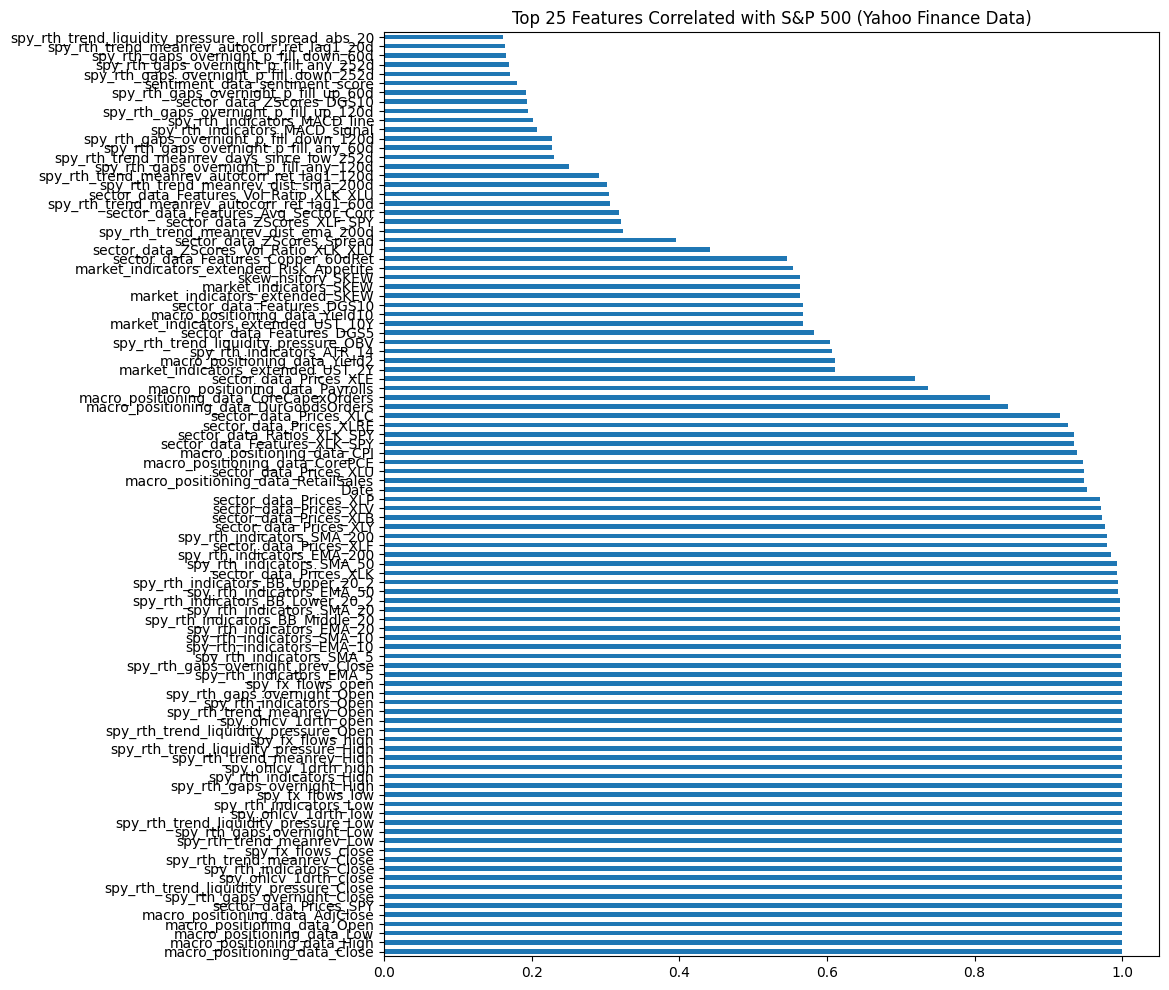

In [43]:
# ----------------------------------------------------------
# 5. CORRELATION WITH S&P 500
# ----------------------------------------------------------
corr = data.corr()["SP500"].sort_values(ascending=False)

print("\n--- Correlation with S&P 500 ---")
print(corr)

# Plot top correlations
plt.figure(figsize=(10, 12))
corr.drop("SP500").head(100).plot(kind="barh")
plt.title("Top 25 Features Correlated with S&P 500 (Yahoo Finance Data)")
plt.show()

In [44]:
# ----------------------------------------------------------
# 7. DIMENSIONALITY REDUCTION – CORRELATION FILTER
# ----------------------------------------------------------
threshold = 0.05
selected_features = corr[abs(corr) > threshold].index.tolist()
selected_features.remove("SP500")

print("\nFeatures kept after correlation filtering:", len(selected_features))

filtered_data = data[selected_features + ["SP500"]]


Features kept after correlation filtering: 193


In [45]:
filtered_data

,macro_positioning_data_Close,macro_positioning_data_High,macro_positioning_data_Low,macro_positioning_data_Open,macro_positioning_data_AdjClose,sector_data_Prices_SPY,spy_rth_gaps_overnight_Close,spy_rth_trend_liquidity_pressure_Close,spy_ohlcv_1drth_close,spy_rth_indicators_Close,...,spy_rth_trend_liquidity_pressure_vol_p95_60,market_indicators_extended_HY_OAS,sector_data_ZScores_Crude_60dRet,sector_data_Ratios_XLF_SPY,sector_data_Features_XLF_SPY,spy_rth_trend_liquidity_pressure_vol_avg_60,sector_data_Ratios_XLU_SPY,sector_data_Features_XLU_SPY,sector_data_Features_DefCyc_Ratio,SP500
0,205.539993,208.190002,205.389999,207.990005,171.185318,171.093674,171.101663,171.101663,171.101663,171.101663,...,2.233268e+08,5.08,1.977554,0.095945,0.095945,1.357064e+08,0.195814,0.195814,1.137140,2058.899902
1,205.429993,206.880005,204.179993,206.380005,171.093689,171.093674,171.043380,171.043380,171.043380,171.043380,...,2.233268e+08,5.08,1.977554,0.095945,0.095945,1.357064e+08,0.195814,0.195814,1.137140,2058.199951
2,201.720001,204.369995,201.350006,204.169998,168.003815,168.003830,167.987696,167.987696,167.987696,167.987696,...,2.233268e+08,5.21,1.977554,0.095655,0.095655,1.357064e+08,0.196977,0.196977,1.137140,2020.579956
3,199.820007,202.720001,198.860001,202.089996,166.421371,166.421448,166.372430,166.372430,166.372430,166.372430,...,2.233268e+08,5.37,1.977554,0.095089,0.095089,1.357064e+08,0.198978,0.198978,1.137140,2002.609985
4,202.309998,202.720001,200.880005,201.419998,168.495163,168.495178,168.445633,168.445633,168.445633,168.445633,...,2.233268e+08,5.31,1.977554,0.094904,0.094904,1.357064e+08,0.198457,0.198457,1.137140,2025.900024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,583.090027,586.619995,581.409973,582.659973,579.763977,579.763977,579.763705,579.763705,579.763705,579.763705,...,1.494780e+08,3.32,0.062994,0.086059,0.086059,7.042338e+07,0.136290,0.136290,0.616056,5842.009766
2614,579.109985,581.809998,575.599976,575.979980,575.806641,575.806641,575.806409,575.806409,575.806409,575.806409,...,1.494780e+08,3.40,0.062994,0.086340,0.086340,7.052348e+07,0.138871,0.138871,0.613411,5802.819824
2615,591.150024,591.309998,578.429993,586.070007,587.778015,587.778015,587.777726,587.777726,587.777726,587.777726,...,1.494780e+08,3.24,0.062994,0.086069,0.086069,7.040423e+07,0.137066,0.137066,0.610244,5921.540039
2616,587.729980,592.770020,586.989990,591.559998,584.377502,584.377502,584.377235,584.377235,584.377235,584.377235,...,1.494780e+08,3.23,0.062994,0.085992,0.085992,7.029759e+07,0.135940,0.135940,0.607026,5888.549805
